In [1]:
# import libs

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from catboost import CatBoostClassifier, Pool, cv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier

import warnings
warnings.filterwarnings('ignore')

import gc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#load the data

data = pd.read_csv('EDU_DATA.csv')

## EDA

In [3]:
data.head(4)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L


In [4]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,480,2,M,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NationalITy,480,14,KW,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlaceofBirth,480,14,KuwaIT,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StageID,480,3,MiddleSchool,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GradeID,480,10,G-02,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SectionID,480,3,A,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic,480,12,IT,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Semester,480,2,F,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relation,480,2,Father,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raisedhands,480,NaN,NaN,NaN,46.775,30.7792,0,15.75,50,75,100


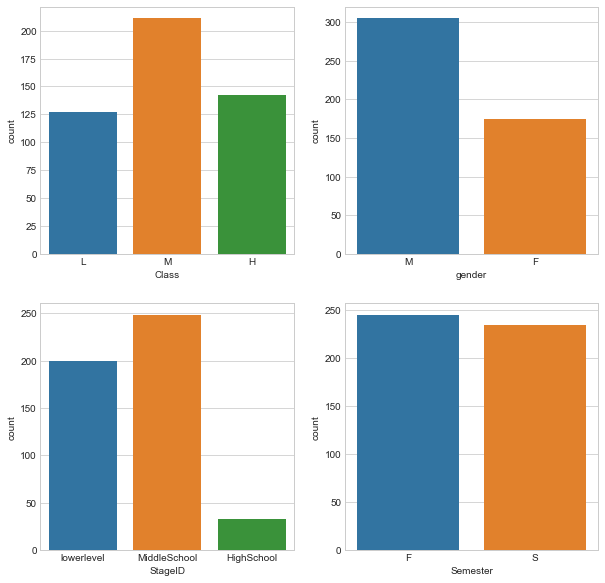

In [5]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=data, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=data, ax=axarr[1,0])
sns.countplot(x='Semester', data=data, ax=axarr[1,1]);

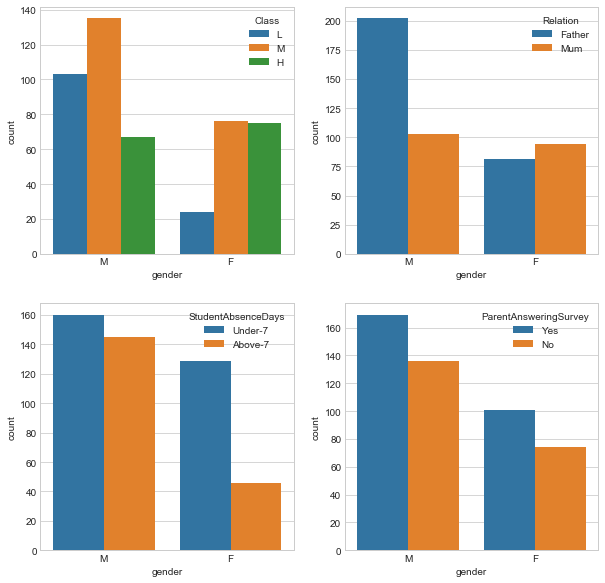

In [6]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data, ax=axarr[1,1], order=['M','F']);

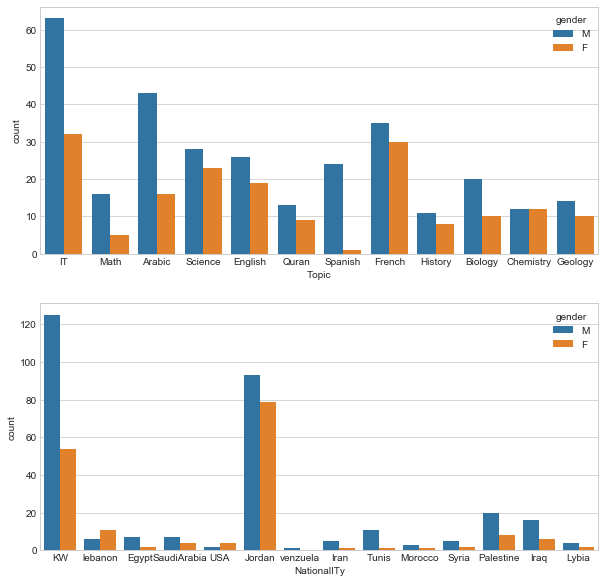

In [7]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=data, ax=axis2);

Percentage of Grade 
 G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


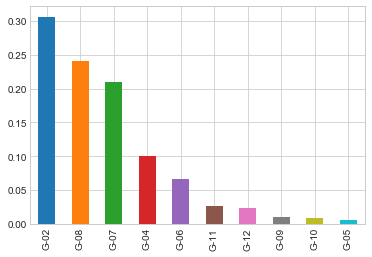

In [8]:
print('Percentage of Grade \n',data.GradeID.value_counts(normalize=True))
data.GradeID.value_counts(normalize=True).plot(kind='bar');

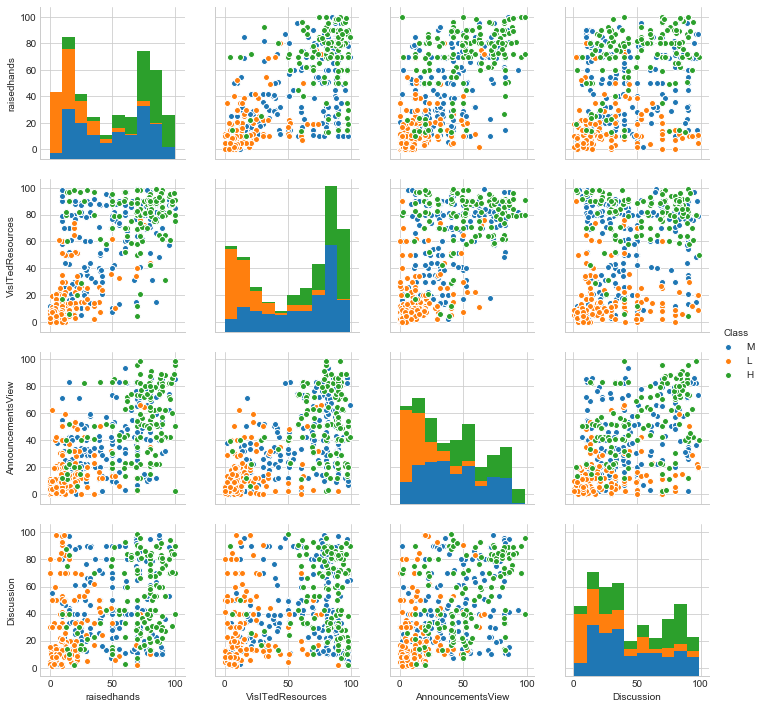

In [9]:
sns.pairplot(data,hue='Class');

## BUILDING MODELS

In [10]:
#prepare target, H - 'high score' will be predicted

replace_list = (['M', 'H', 'L'],[0,1,0])
for i in range(3):
        data['Class'].replace(replace_list[0][i], replace_list[1][i],inplace=True)

In [11]:
#separate data for training and test

data_train, data_test, lbls_train, lbls_test = train_test_split(data.drop('Class', axis = 1),
                                                                data['Class'], test_size=0.2,
                                                                random_state = 42) 

In [12]:
#find categorical columns

categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
cat_features = list(map(lambda x: list(data.columns).index(x), categorical_columns))
cat_features

[0, 1, 2, 3, 4, 5, 6, 7, 8, 13, 14, 15]

In [13]:
#check count of unique values in each categorical column

for col in categorical_columns:
    print(col, ': ', len(data[col].unique()))

gender :  2
NationalITy :  14
PlaceofBirth :  14
StageID :  3
GradeID :  10
SectionID :  3
Topic :  12
Semester :  2
Relation :  2
ParentAnsweringSurvey :  2
ParentschoolSatisfaction :  2
StudentAbsenceDays :  2


In [14]:
#function for preparing data for modeling

def preprocessing(data):
    
    #LabelEncoder for binary columns
    #OneHotEncoder for categorical columns
    
    columns_for_dum = []
    
    for col in categorical_columns:
        if len(data[col].unique())==2:
            rep_list = (sorted(list(data[col].unique())), [0,1])
            for i in range(2):
                data[col].replace(rep_list[0][i], rep_list[1][i],inplace=True)
        else:
            columns_for_dum.append(col)
    
    data = pd.get_dummies(data, columns = columns_for_dum)
    
    #scale the data
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    
    return data

In [15]:
#shape of the data before preparing

data_train.shape

(384, 16)

In [16]:
#data preparing

data_train_pre = preprocessing(data_train)
data_test_pre = preprocessing(data_test)

In [17]:
#shape of the data after preparing

data_train.shape

(384, 16)

In [18]:
#models for investigations

knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
grc = GradientBoostingClassifier()
sgd = SGDClassifier()

In [19]:
#count of fold for checking model results

kfold = 5

In [20]:
#function for metrics' calculation

def metrics_for_models(metric):
    print("Результаты для метрики ", metric)
    print('---')
    scores_knn = cross_validation.cross_val_score(knn, data_train_pre, lbls_train, cv = kfold, scoring = metric)
    print("KNeighborsClassifier: ", scores_knn.mean())
    scores_rfc = cross_validation.cross_val_score(rfc, data_train_pre, lbls_train, cv = kfold, scoring = metric)
    print("RandomForestClassifier: ", scores_rfc.mean())
    scores_grc = cross_validation.cross_val_score(grc, data_train_pre, lbls_train, cv = kfold, scoring = metric)
    print("GradientBoostingClassifier: ", scores_grc.mean())
    scores_sgd = cross_validation.cross_val_score(sgd, data_train_pre, lbls_train, cv = kfold, scoring = metric)
    print("SGDClassifier: ", scores_sgd.mean())
    print('-------------------')

In [21]:
#different metrics for models

metrics_for_models('roc_auc')
metrics_for_models('accuracy')
metrics_for_models('precision')
metrics_for_models('recall')

Результаты для метрики  roc_auc
---
KNeighborsClassifier:  0.8229196903725207
RandomForestClassifier:  0.8992032535074987
GradientBoostingClassifier:  0.9024008224479922
SGDClassifier:  0.8813014029995163
-------------------
Результаты для метрики  accuracy
---
KNeighborsClassifier:  0.7681134654818866
RandomForestClassifier:  0.8439166097060834
GradientBoostingClassifier:  0.8541695146958306
SGDClassifier:  0.7811688311688312
-------------------
Результаты для метрики  precision
---
KNeighborsClassifier:  0.6483882783882784
RandomForestClassifier:  0.7895024741340532
GradientBoostingClassifier:  0.7850171743964847
SGDClassifier:  0.6777514544210522
-------------------
Результаты для метрики  recall
---
KNeighborsClassifier:  0.6000000000000001
RandomForestClassifier:  0.6666666666666666
GradientBoostingClassifier:  0.7583333333333333
SGDClassifier:  0.7166666666666667
-------------------


In [22]:
#Using catboost for modeling

# train, test pool
train_pool = Pool(data_train, lbls_train, cat_features=cat_features)
test_pool = Pool(data_test, cat_features=cat_features)  

# CatBoost
clf = CatBoostClassifier(random_state=42)
clf.fit(train_pool, verbose=False)
    
y_pro = clf.predict_proba(test_pool)[:,1]
y_pre = clf.predict(test_pool)
    
# metrics values
auc = metrics.roc_auc_score(lbls_test, y_pro)
accuracy = metrics.accuracy_score(lbls_test, y_pre)
precision = metrics.precision_score(lbls_test, y_pre)
recall = metrics.recall_score(lbls_test, y_pre)

#print results
print('CatBoost cv') 
print('AUC: ', auc)
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

Learning rate set to 0.012779
CatBoost cv
AUC:  0.9551597051597052
Accuracy:  0.8958333333333334
Precision:  0.7727272727272727
Recall:  0.7727272727272727


In [23]:
feature_score = pd.DataFrame(list(zip(data.dtypes.index, clf.get_feature_importance(train_pool))),
                columns=['Feature','Score'])

In [24]:
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

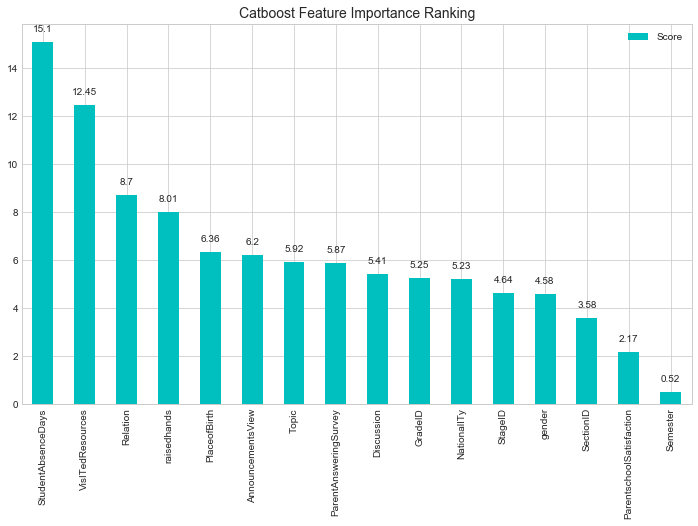

In [25]:
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

# get feature score as labels round to 2 decimal
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()